In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('Agosto Vacios.xlsx')
colum=['CONSECUTIVO','Vehicle plate','Origin','Destination','Distance KMS','Fecha y Hora de cargue','Fecha Finalizacion','Freight']
df=df[colum]


In [3]:
summary=df.describe()
print(df.head())

# Calcular el costo total de los vacíos
costo_total_vacios = df['Freight'].sum()

print("Costo total de los vacíos:", costo_total_vacios)


  CONSECUTIVO Vehicle plate                   Origin    Destination  \
0      VC1082        FVQ470                  DUITAMA          FUNZA   
1      VC1081        FVQ494          BARRANCABERMEJA    BUCARAMANGA   
2      VC1080        FVQ495               VILLANUEVA       CASTILLA   
3      VC1079        FVN739                    OASIS  VILLAVICENCIO   
4      VC1077        FVR346  CANO SUR CAMPAMENTO X14  VILLAVICENCIO   

   Distance KMS Fecha y Hora de cargue   Fecha Finalizacion  Freight  
0           215    2023-08-31 13:00:00  2023-08-31 18:00:00   600000  
1           102    2023-08-31 14:30:00  2023-08-31 18:00:00   600000  
2           166    2023-08-31 10:10:00  2023-08-31 14:00:00   600000  
3           137     2023-08-31 9:00:00  2023-08-31 17:00:00   600000  
4           250     2023-08-30 6:00:00  2023-08-30 15:00:00   600000  
Costo total de los vacíos: 78600000


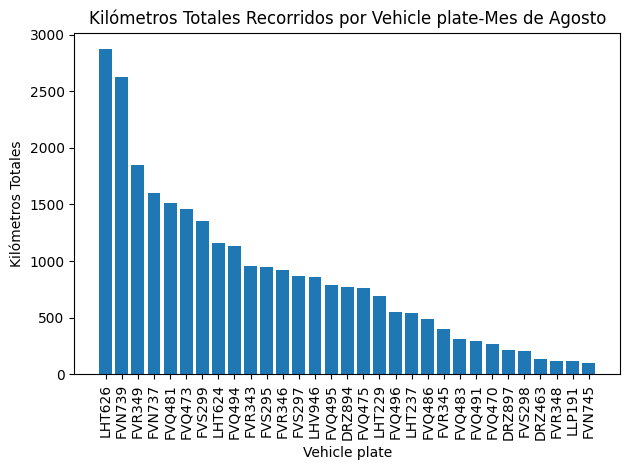

In [4]:
# Agrupar y sumar los kilómetros por Vehicle plate
kilometros_por_placa = df.groupby('Vehicle plate')['Distance KMS'].sum()
kilometros_por_placa=kilometros_por_placa.sort_values(ascending=False)

# Crear el gráfico de barras
plt.bar(kilometros_por_placa.index, kilometros_por_placa.values)
plt.xlabel('Vehicle plate')
plt.ylabel('Kilómetros Totales')
plt.title('Kilómetros Totales Recorridos por Vehicle plate-Mes de Agosto')
plt.xticks(rotation=90)  # Rotar las etiquetas en el eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

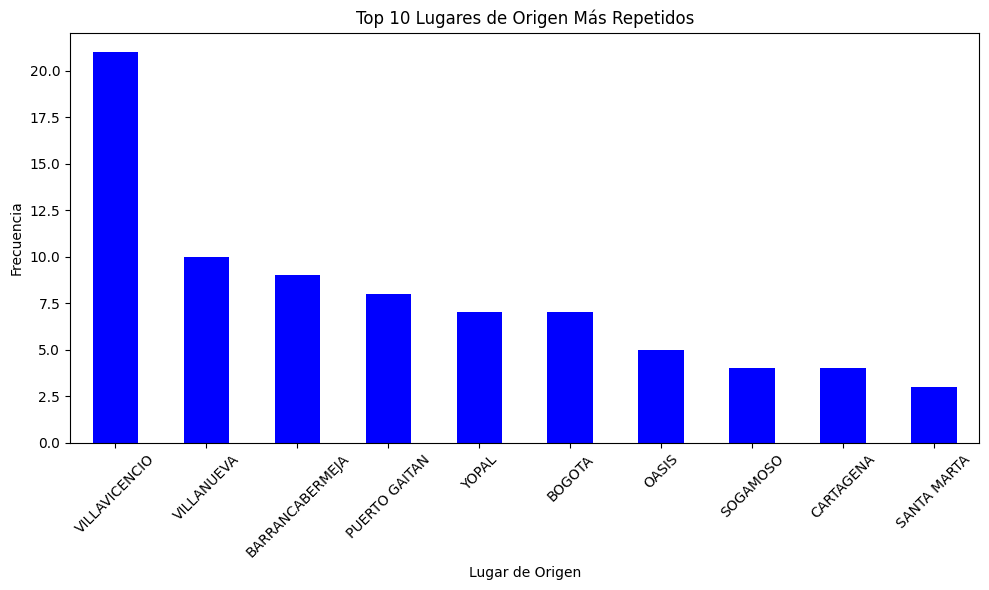

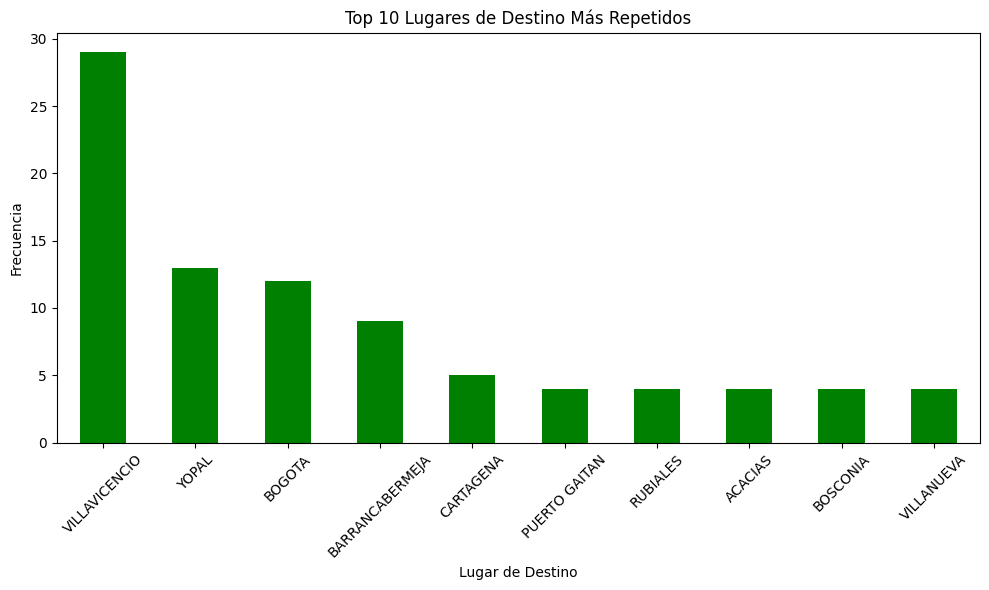

Top 5 rutas más repetidas:
Ruta
VILLANUEVA -> VILLAVICENCIO       5
PUERTO GAITAN -> VILLAVICENCIO    4
VILLAVICENCIO -> ACACIAS          4
VILLANUEVA -> YOPAL               3
BARRANCABERMEJA -> BOSCONIA       3
Name: count, dtype: int64
Top 5 rutas más repetidas:
Ruta
VILLANUEVA -> VILLAVICENCIO       5
PUERTO GAITAN -> VILLAVICENCIO    4
VILLAVICENCIO -> ACACIAS          4
VILLANUEVA -> YOPAL               3
BARRANCABERMEJA -> BOSCONIA       3
Name: count, dtype: int64


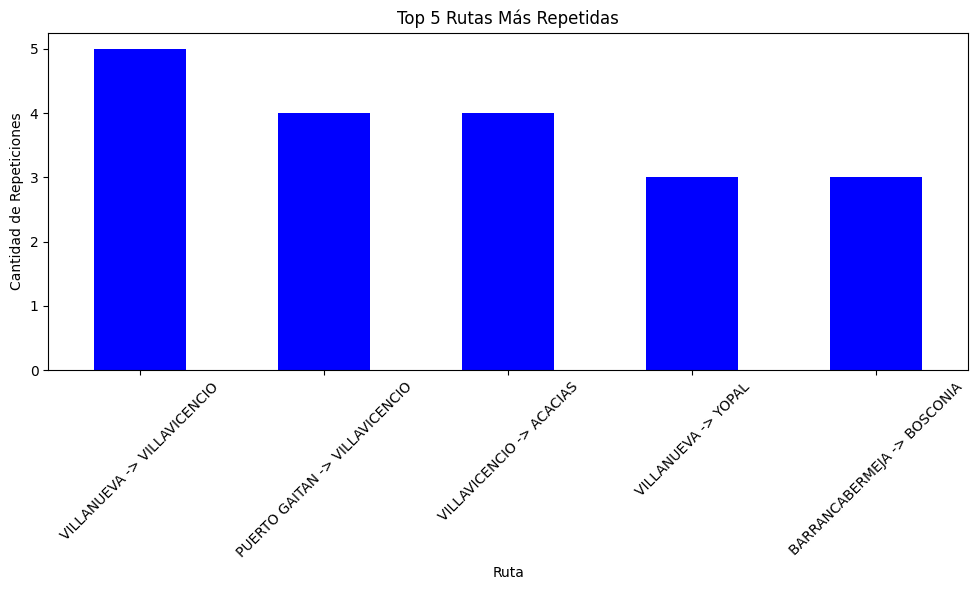

In [5]:
from unidecode import unidecode
import re
def limpiar_lugares(lugar):
    lugar=str(lugar)
    lugar=unidecode(lugar)
    lugar=lugar.upper()
    ciudades=['BOGOTA','VILLAVICENCIO','NEIVA','COTA','PUERTO WILCHES','CASTILLA','ACACIAS','OASIS',"ACACIAS","SOGAMOSO","CARTAGENA","SANTA MARTA","MONTERIA","SAHAGUN","BOSCONIA","CASTILLA","RUBIALES","PUERTO GAITAN","OASIS","CHIPAQUE",'PENDARE',"BARRANCABERMEJA","BUCARAMANGA","YOPAL","VILLANUEVA","VALLEDUPAR","AGUACHICA","RUBIALES","PUERTO BOYACA","TIBABOSA","PAZ DE ARIPORO","CRISTALINA",'MELGAR','CANO SUR','CAÑO SUR']
    for ciudad in ciudades:
        match=re.search(rf'\b{ciudad}\b',lugar,flags=re.IGNORECASE)
        if match:
            return match.group()     
    return lugar

df['Origin']=df['Origin'].apply(limpiar_lugares)
df['Destination']=df['Destination'].apply(limpiar_lugares)
# Obtener los lugares más repetidos para origen y destino
top_origen = df['Origin'].value_counts().head(10)
top_destino = df['Destination'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_origen.plot(kind='bar', color='blue')
plt.xlabel('Lugar de Origen')
plt.ylabel('Frecuencia')
plt.title('Top 10 Lugares de Origen Más Repetidos')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Crear el gráfico de barras para destino
plt.figure(figsize=(10, 6))
top_destino.plot(kind='bar', color='green')
plt.xlabel('Lugar de Destino')
plt.ylabel('Frecuencia')
plt.title('Top 10 Lugares de Destino Más Repetidos')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Crear una nueva columna que combine origen y destino
df['Ruta'] = df['Origin'] + ' -> ' + df['Destination']

# Obtener las rutas más repetidas (top 5)
top_rutas = df['Ruta'].value_counts().head(5)

# Imprimir las rutas más repetidas
print("Top 5 rutas más repetidas:")
print(top_rutas)

df['Ruta'] = df['Origin'] + ' -> ' + df['Destination']

# Obtener las rutas más repetidas (top 5)
top_rutas = df['Ruta'].value_counts().head(5)

# Imprimir las rutas más repetidas
print("Top 5 rutas más repetidas:")
print(top_rutas)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_rutas.plot(kind='bar', color='blue')
plt.xlabel('Ruta')
plt.ylabel('Cantidad de Repeticiones')
plt.title('Top 5 Rutas Más Repetidas')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()









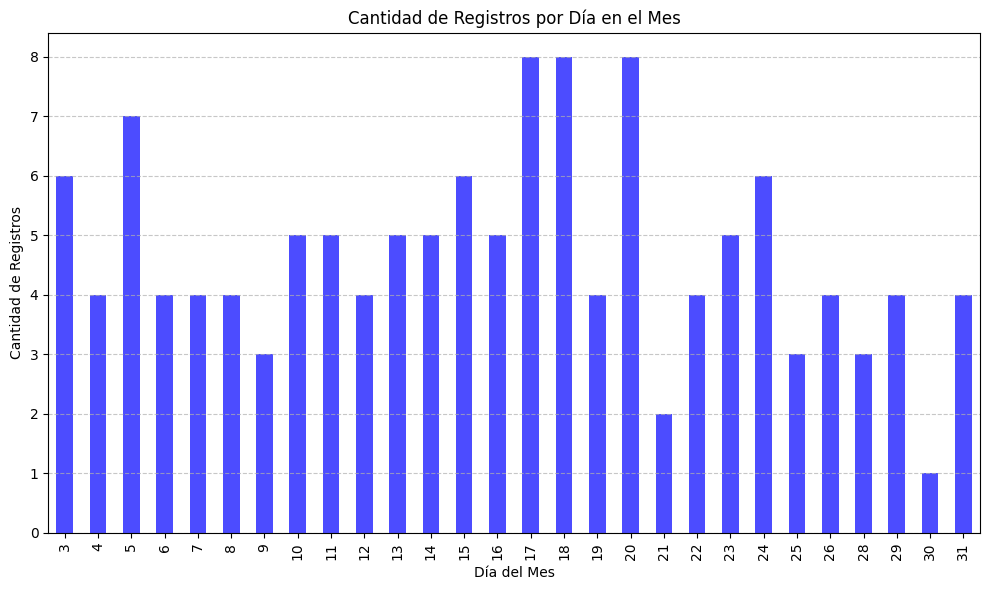

count    28.000000
mean      4.678571
std       1.700840
min       1.000000
25%       4.000000
50%       4.000000
75%       5.250000
max       8.000000
Name: count, dtype: float64


In [8]:
df['Fecha y Hora de cargue'] = pd.to_datetime(df['Fecha y Hora de cargue'])

# Extraer el día de la fecha y crear una nueva columna
df['Día'] = df['Fecha y Hora de cargue'].dt.day

# Contar cuántos registros hay por día
conteo_por_dia = df['Día'].value_counts().sort_index()

# Crear un gráfico de barras para mostrar el conteo por día
plt.figure(figsize=(10, 6))
conteo_por_dia.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Día en el Mes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
summary=conteo_por_dia.describe()
print(summary)